In [25]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import csv
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [26]:
train = pd.read_csv("D:\\MY_DESKTOP\\Everything ML_python\\ML\\train_IA.csv")

In [27]:
print(train.columns)

print(train.dtypes)

print(train.shape)
train.info()

Index(['Loan_ID', 'Gender', 'Education', 'Marital_Status', 'Employment_Type',
       'Residential_Status', 'Dependents', 'Applicant_Monthly_Income',
       'Loan_Amount', 'Loan_Type', 'Term_of_Loan', 'Loan_Status'],
      dtype='object')
Loan_ID                     object
Gender                      object
Education                   object
Marital_Status              object
Employment_Type             object
Residential_Status          object
Dependents                  object
Applicant_Monthly_Income    object
Loan_Amount                  int64
Loan_Type                   object
Term_of_Loan                 int64
Loan_Status                 object
dtype: object
(614, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Loan_ID                   614 non-null    object
 1   Gender                    602 non-null    obje

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Loan_ID                   614 non-null    object
 1   Gender                    614 non-null    object
 2   Education                 614 non-null    object
 3   Marital_Status            614 non-null    object
 4   Employment_Type           614 non-null    object
 5   Residential_Status        614 non-null    object
 6   Dependents                614 non-null    object
 7   Applicant_Monthly_Income  614 non-null    object
 8   Loan_Amount               614 non-null    int64 
 9   Loan_Type                 614 non-null    object
 10  Term_of_Loan              614 non-null    int64 
 11  Loan_Status               614 non-null    object
dtypes: int64(2), object(10)
memory usage: 57.7+ KB


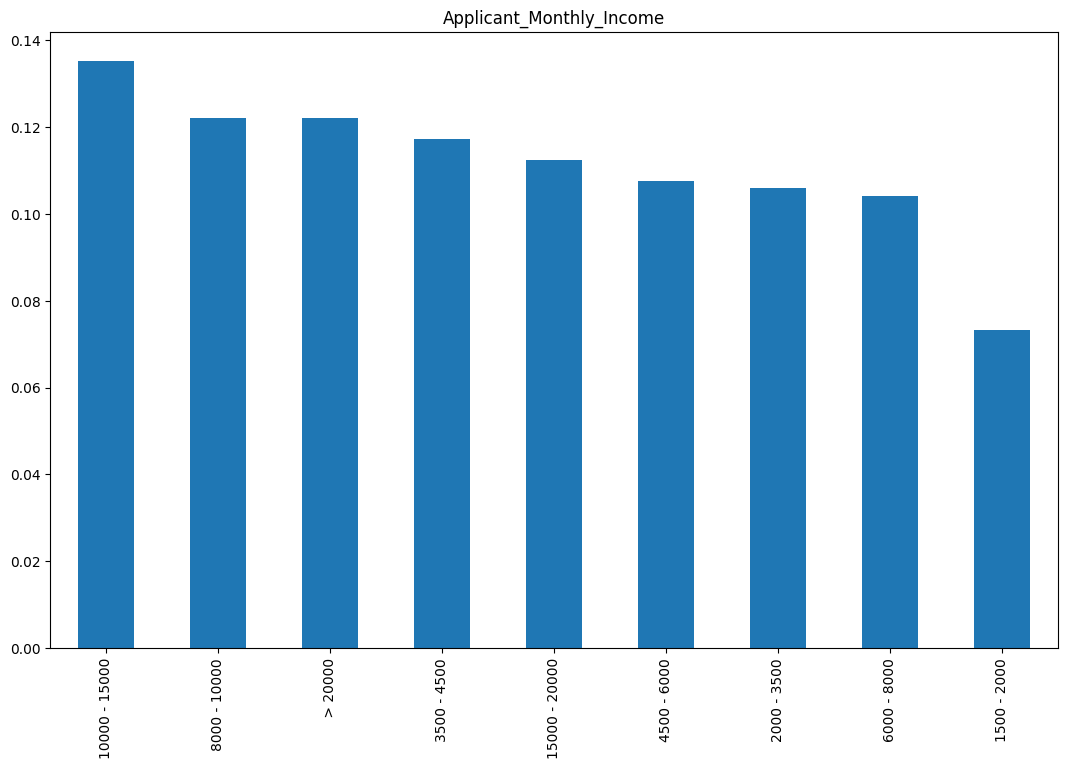

In [30]:
#Applicant Income Dist.
train["Applicant_Monthly_Income"].value_counts(normalize = True).plot.bar(figsize=(13,8), title='Applicant_Monthly_Income');

C:\Users\NANA ADOMAKO ANSAH\AppData\Local\Temp\ipykernel_15092\4104607438.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Loan_Amount"])


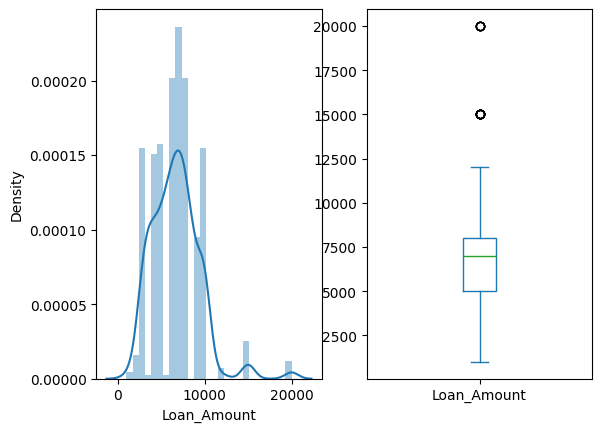

In [31]:
#Numerical
plt.subplot(121)
sns.distplot(train["Loan_Amount"])
# we used distplot to check the distribution(normal or skewed)
#since data is skewed, hence we will visualise with boxplot to check for outliers
plt.subplot(122)
train["Loan_Amount"].plot.box()
plt.show()

In [15]:
# #Removing outliers
# high = train["Loan_Amount"].quantile(0.95)
# mask_area = train["Loan_Amount"] < high
# train = train[mask_area]

In [16]:
# #Reviewing outlier removal
# plt.subplot(121)
# sns.distplot(train["Loan_Amount"])
# plt.subplot(122)
# train["Loan_Amount"].plot.box()
# plt.show()

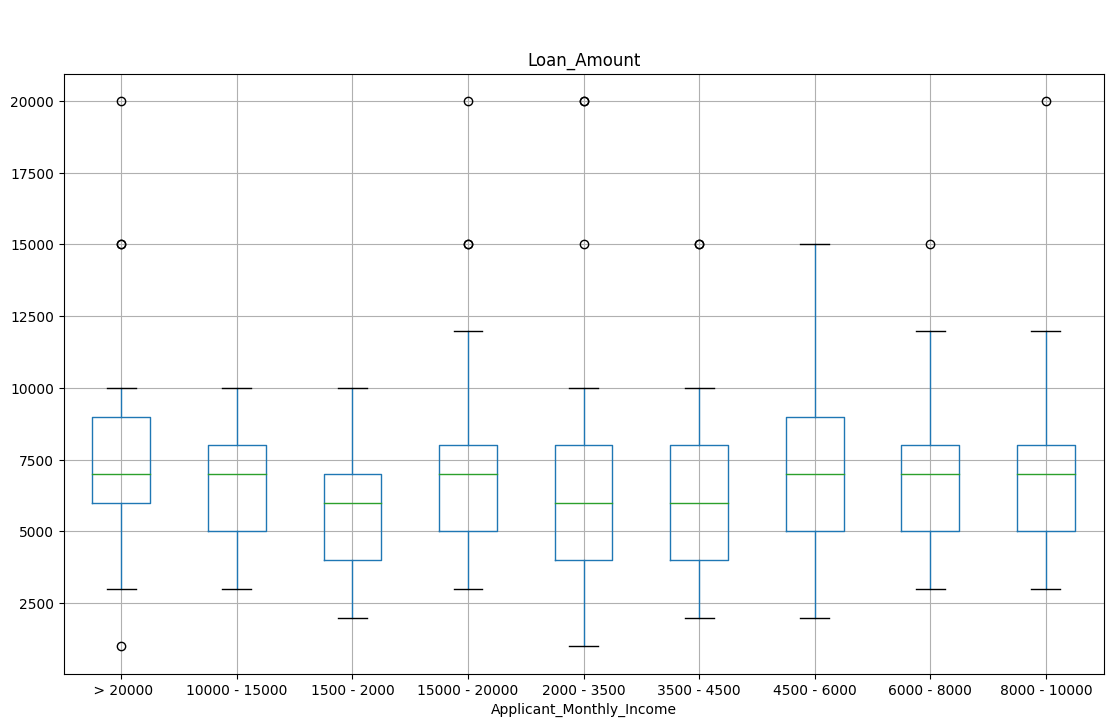

In [32]:
#which category of earners request for large loans
train.boxplot(column="Loan_Amount", by= "Applicant_Monthly_Income", figsize= (13,8) )
plt.suptitle(" ")
plt.show()

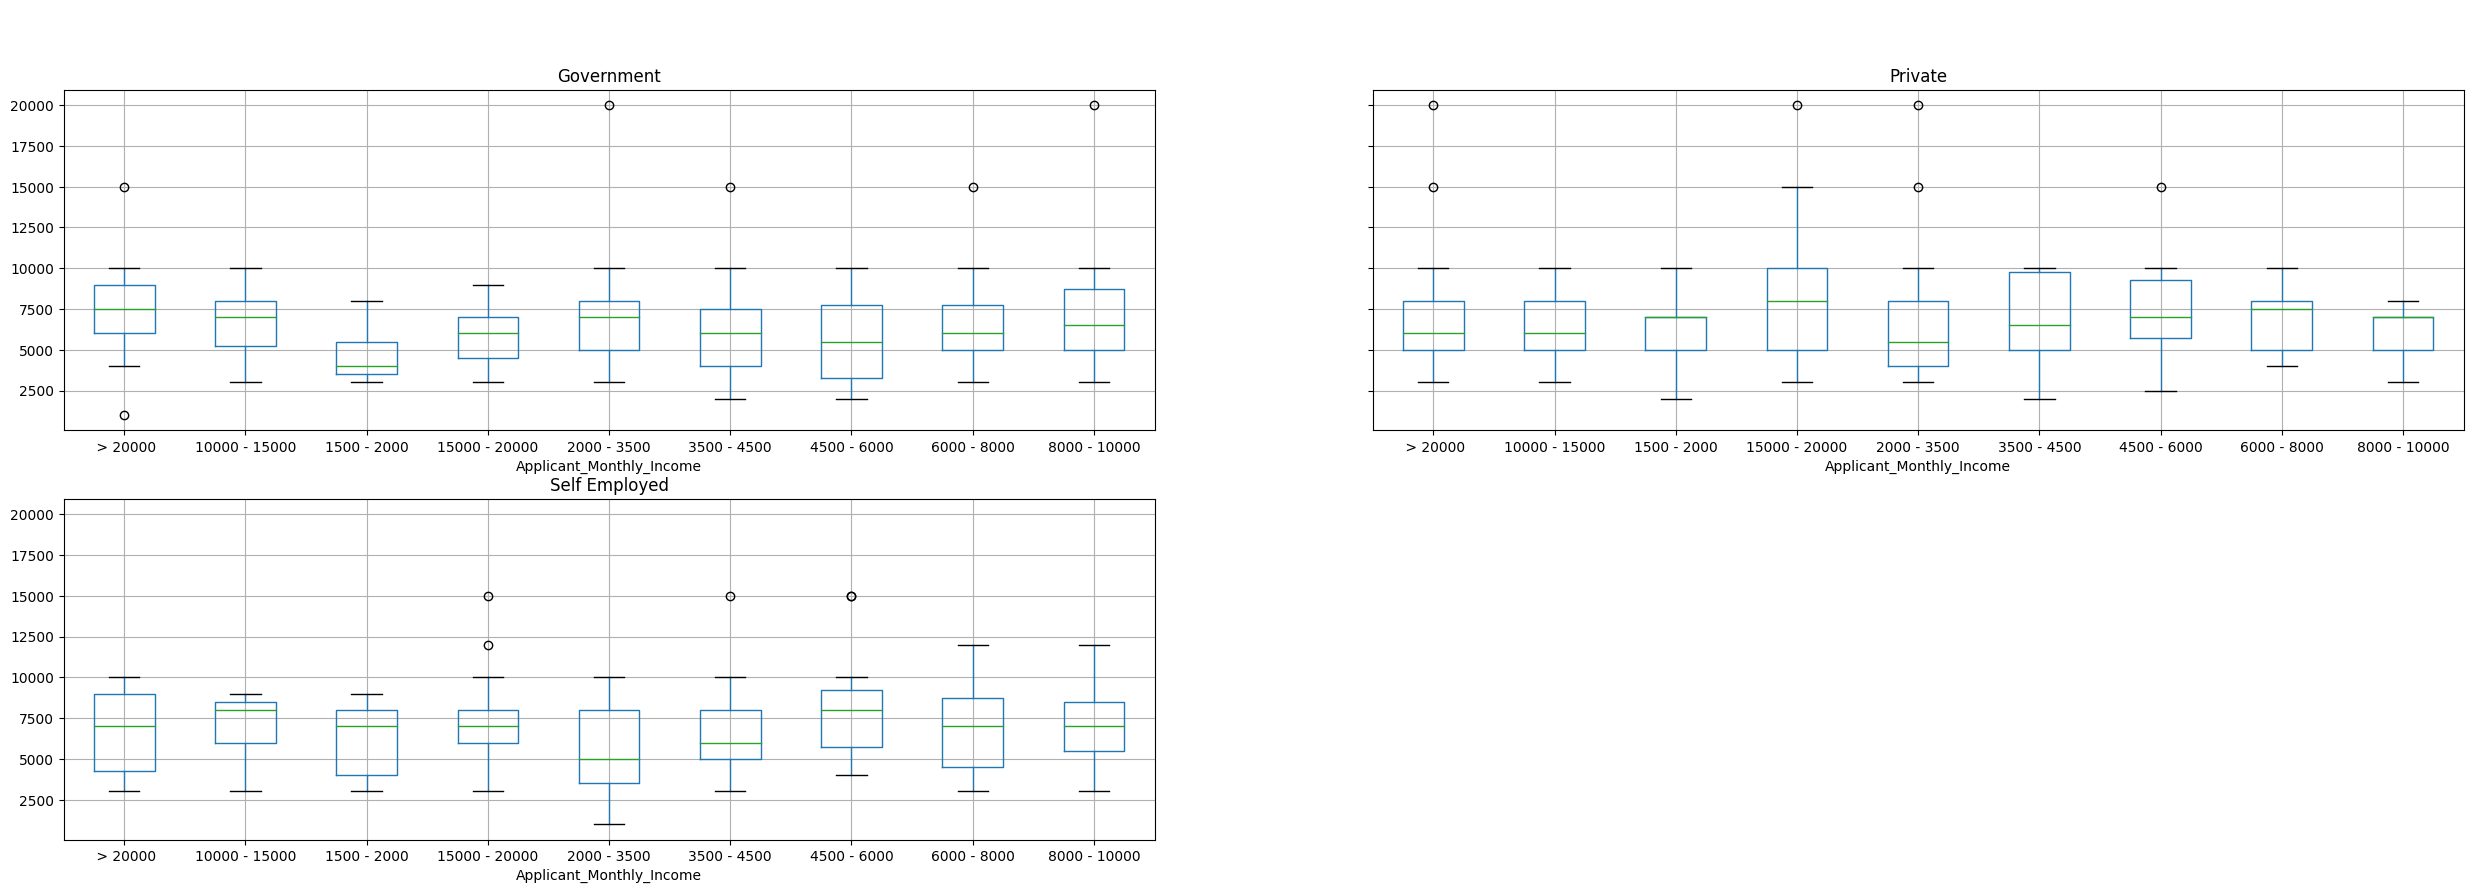

In [33]:
#Evaluating the category of earners and their Loan Amount grouped by Employemnt Type
train.groupby("Employment_Type").boxplot(column="Loan_Amount", by= "Applicant_Monthly_Income", figsize= (30, 10))
plt.suptitle(" ")
plt.show()

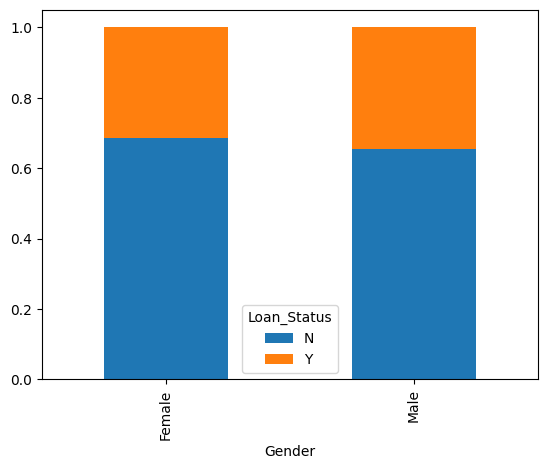

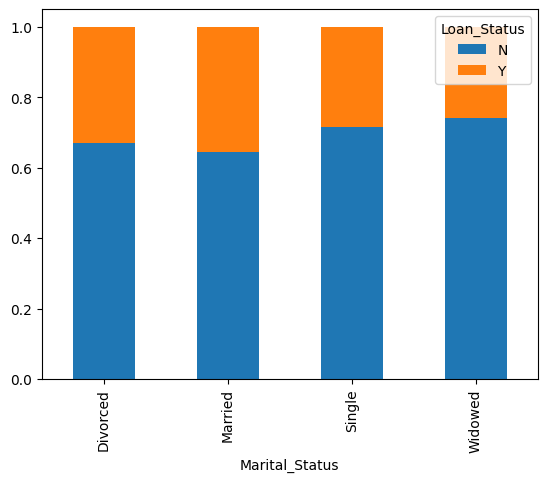

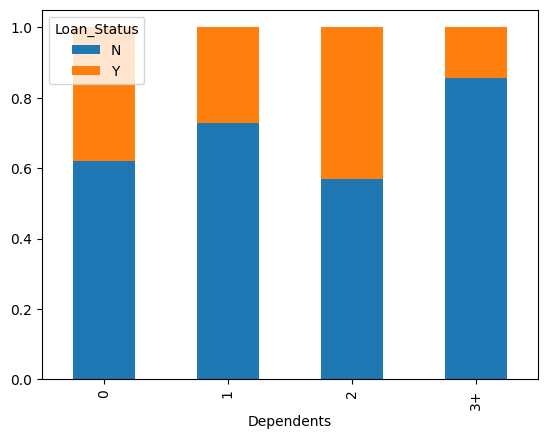

<Axes: xlabel='Loan_Type'>

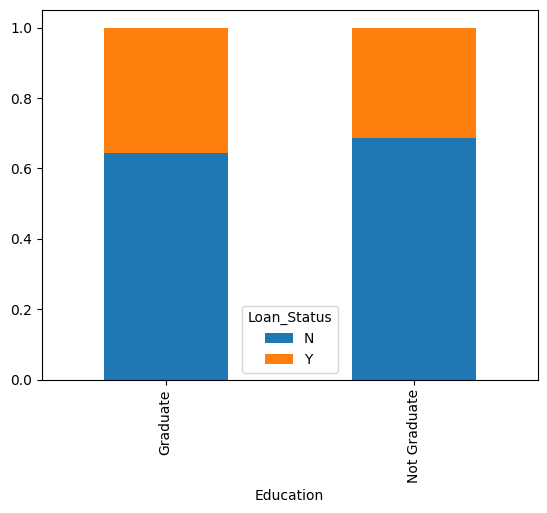

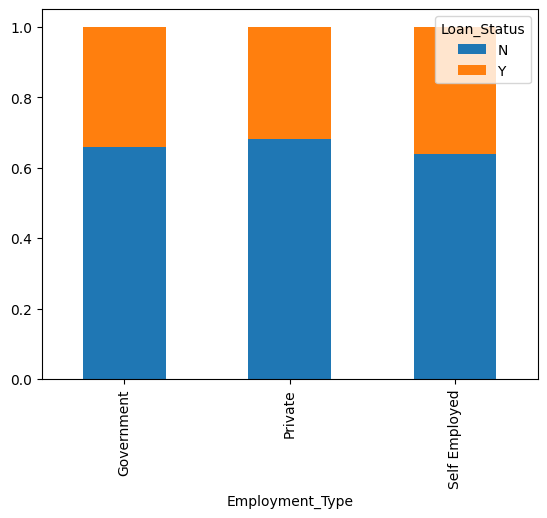

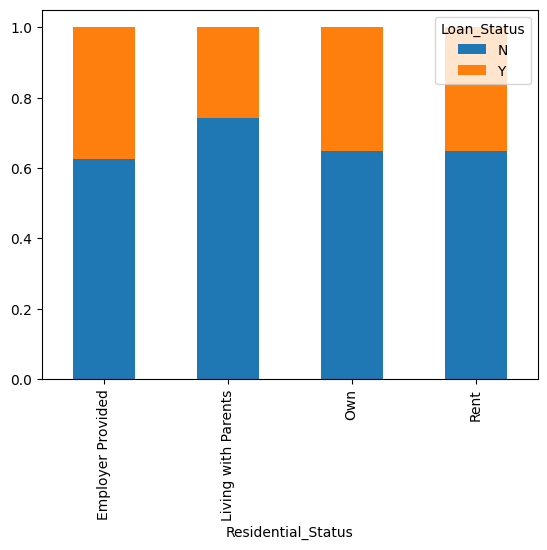

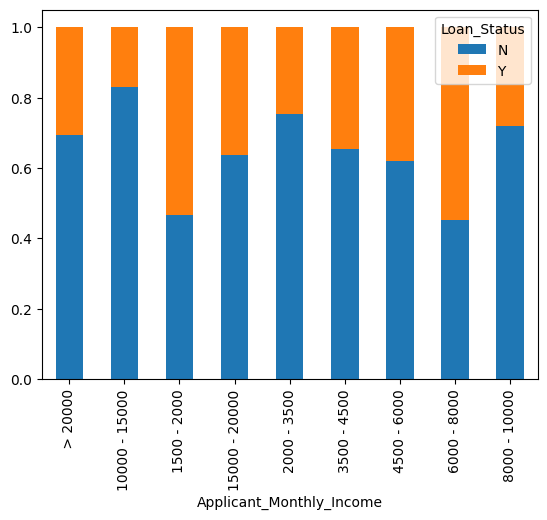

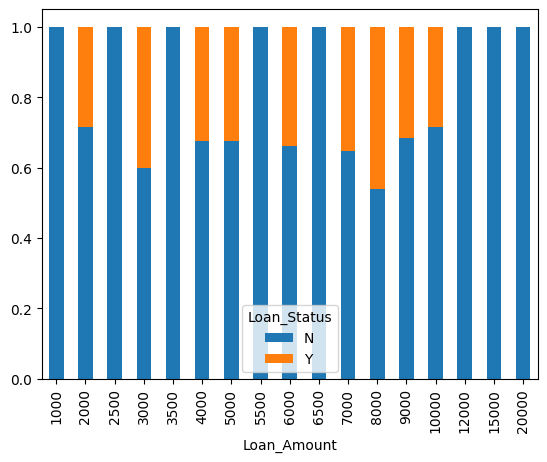

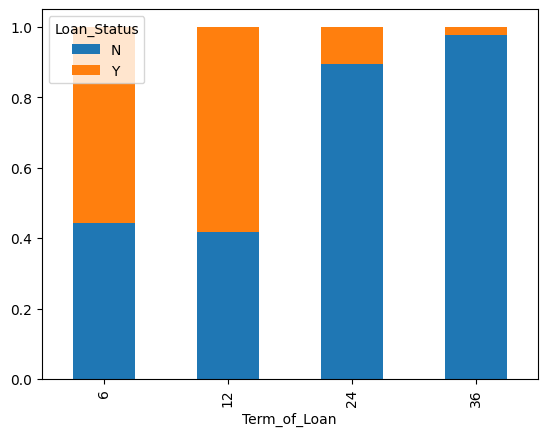

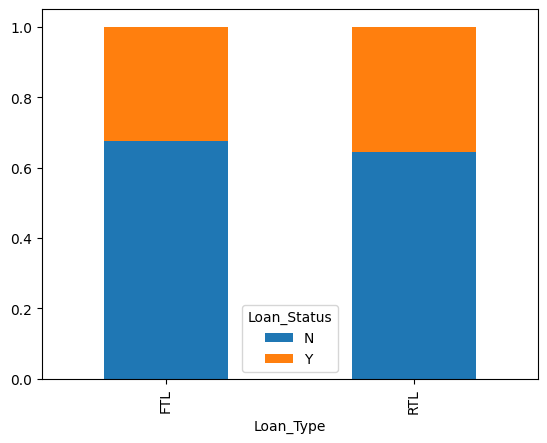

In [34]:
#Bivariate analysis
Gender= pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.show()
Marital_Status = pd.crosstab(train['Marital_Status'], train['Loan_Status'])
Marital_Status .div(Marital_Status.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.show()
Dependents= pd.crosstab(train["Dependents"], train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Education= pd.crosstab(train["Education"], train["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
Employment_Type = pd.crosstab(train["Employment_Type"], train["Loan_Status"])
Employment_Type.div(Employment_Type.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
Residence = pd.crosstab(train["Residential_Status"], train["Loan_Status"])
Residence.div(Residence.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
Applicant_Income= pd.crosstab(train["Applicant_Monthly_Income"], train["Loan_Status"])
Applicant_Income.div(Applicant_Income.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
Loan_Amount = pd.crosstab(train["Loan_Amount"], train["Loan_Status"])
Loan_Amount.div(Loan_Amount.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
Loan_Term = pd.crosstab(train["Term_of_Loan"], train["Loan_Status"])
Loan_Term.div(Loan_Term.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
Loan_Type = pd.crosstab(train["Loan_Type"], train["Loan_Status"])
Loan_Type.div(Loan_Type.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)


In [35]:
#model building
#Splitting into X and Y
target = "Loan_Status"
X = train.drop(columns = ["Loan_ID", "Loan_Status"])
y = train[target]

In [36]:
#Splitting into train, validation and test data set
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42
)

In [38]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.20, random_state = 42
)

In [39]:
#Model bilding II
RF_model= make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state= 42)
)
RF_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Education', 'Marital_Status',
                                      'Employment_Type', 'Residential_Status',
                                      'Dependents', 'Applicant_Monthly_Income',
                                      'Loan_Type'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'Education',
                                          'data_type': dtype('O'),
                                          'mapping': Graduate        1
Not Graduate    2
NaN            -...
2      2
3+     3
1      4
NaN   -2
dtype: int64},
                                         {'col': 'Applicant_Monthly_Income',
                                          'data_type': dtype('O'),
                                          'mapping': 8000 - 10000     1
 > 20000         2
6000 - 8000      3
10000 - 15000    4
15000 - 20000    5
2000 - 3500      6
4500 - 6000      7
3500 - 4500      8
1500 - 2000      9
NaN             -2
dtype: int64},
                                         {'col': 'Loan_Type',
                                          'data_type': dtype('O'),
                                          'mapping': RTL    1
FTL    2
NaN   -2
dtype: int64}])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [43]:
acc_baseline = y_train.value_counts(normalize = True).max()

pred_val= RF_model.predict(X_val)
val_score= round(accuracy_score(y_val, pred_val), 2)

pred_tr= RF_model.predict(X_train)
tr_score= round(accuracy_score(y_train, pred_tr), 2)

pred_tst= RF_model.predict(X_test)
tst_score= round(accuracy_score(y_test, pred_tst), 2)

print("Baseline Accuracy:", round(acc_baseline, 2))
print('validation Accuracy:', round(val_score, 2))
print("Training Accuracy:", round(tr_score, 2))
print("Testing Accuracy:", round(tst_score, 2))

Baseline Accuracy: 0.66
validation Accuracy: 0.79
Training Accuracy: 1.0
Testing Accuracy: 0.79


In [44]:
features = X_train.columns
importances = RF_model.named_steps["randomforestclassifier"].feature_importances_
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.head(10)

Gender                      0.025281
Education                   0.038731
Loan_Type                   0.038800
Employment_Type             0.060961
Marital_Status              0.061288
Dependents                  0.077559
Residential_Status          0.084569
Applicant_Monthly_Income    0.131725
Loan_Amount                 0.145461
Term_of_Loan                0.335624
dtype: float64

In [66]:
#model seeems to be overfitting, hence we try stratified k fold -we have to maintain the class distribution

# Define StratifiedKFold
kf = StratifiedKFold(n_splits= 5, shuffle=True, random_state= 42)


# Iterate over StratifiedKFold splits
i = 1
for train_index, val_index in kf.split(X_train, y_train):
    print(f'\nFold {i} of {kf.n_splits}')
    X_tr, X_valid = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_valid = y_train.iloc[train_index], y_train.iloc[val_index]
    
    RF_model_2 = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state= 42)
    )

    RF_model_2.fit(X_tr, y_tr)
    
    pred_valid = RF_model_2.predict(X_valid)
    score = accuracy_score(y_valid, pred_valid)
    print('Validation accuracy_score:', round(score, 2))
    
    i += 1

# After K-Fold, evaluate the model on the test set
RF_model_2.fit(X_train, y_train)
pred_test =RF_model_2.predict(X_test)
test_score = accuracy_score(y_test, pred_test)
print('\nTest accuracy_score:', round(test_score, 2))



Fold 1 of 5
Validation accuracy_score: 0.78

Fold 2 of 5
Validation accuracy_score: 0.8

Fold 3 of 5
Validation accuracy_score: 0.72

Fold 4 of 5
Validation accuracy_score: 0.78

Fold 5 of 5
Validation accuracy_score: 0.77

Test accuracy_score: 0.79


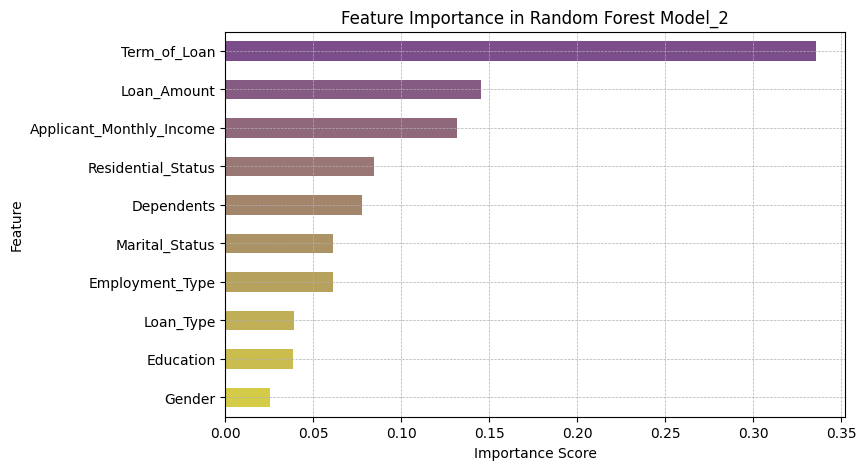

In [46]:
#Feature Importance
features = X_train.columns
importances = RF_model_2.named_steps["randomforestclassifier"].feature_importances_
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.head(10)
def get_color_gradient(color1, color2, num_colors):
    color1 = np.array([int(color1[i:i+2], 16) for i in (1, 3, 5)])
    color2 = np.array([int(color2[i:i+2], 16) for i in (1, 3, 5)])
    colors = [
        '#' + ''.join([format(int(c), '02x') for c in (color1 + (color2 - color1) * i / (num_colors - 1)).astype(int)])
        for i in range(num_colors)
    ]
    return colors
# Generate the color gradient
num_features = len(feat_imp)
colors = get_color_gradient("#D4CC47", "#7C4D8B", num_features)

# Plot
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh', x='Feature', y='Importance', color=colors, legend=False)
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest Model_2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [51]:
#Model Building III
#Finding the best model parameter

# Define the parameter grid using the correct model prefix "randomforestclassifier__"
paramgrid = {'randomforestclassifier__max_depth': list(range(1, 20, 2)),
             'randomforestclassifier__n_estimators': list(range(1, 200, 20))}

# Create the pipeline
RF_model_2 = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state=42)
)

# Create the GridSearchCV object
grid_search = GridSearchCV(RF_model_2, paramgrid)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best estimator
print(grid_search.best_estimator_)
grid_search.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Education', 'Marital_Status',
                                      'Employment_Type', 'Residential_Status',
                                      'Dependents', 'Applicant_Monthly_Income',
                                      'Loan_Type'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'Education',
                                          'data_type': dtype('O'),
                                          'mapping': Graduate        1
Not Graduate    2
NaN            -...
                                         {'col': 'Applicant_Monthly_Income',
                                          'data_type': dtype('O'),
                                          'mapping': 8000 - 100

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Education', 'Marital_Status',
                                      'Employment_Type', 'Residential_Status',
                                      'Dependents', 'Applicant_Monthly_Income',
                                      'Loan_Type'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'Education',
                                          'data_type': dtype('O'),
                                          'mapping': Graduate        1
Not Graduate    2
NaN            -...
                                         {'col': 'Applicant_Monthly_Income',
                                          'data_type': dtype('O'),
                                          'mapping': 8000 - 10000     1
 > 20000         2
6000 - 8000      3
10000 - 15000    4
15000 - 20000    5
2000 - 3500      6
4500 - 6000      7
3500 - 4500      8
1500 - 2000      9
NaN             -2
dtype: int64},
                                         {'col': 'Loan_Type',
                                          'data_type': dtype('O'),
                                          'mapping': RTL    1
FTL    2
NaN   -2
dtype: int64}])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=7, n_estimators=41,
                                        random_state=42))])

In [52]:
#Evaluating on validation data set
pred_test= grid_search.best_estimator_.predict(X_test)
score= round(accuracy_score(y_test, pred_test), 2)

print('Test accuracy_score', score)


Test accuracy_score 0.8


In [53]:
#DECISION TREES MODEL
DT_model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier()
)
# Fit model to training data
DT_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Education', 'Marital_Status',
                                      'Employment_Type', 'Residential_Status',
                                      'Dependents', 'Applicant_Monthly_Income',
                                      'Loan_Type'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'Education',
                                          'data_type': dtype('O'),
                                          'mapping': Graduate        1
Not Graduate    2
NaN            -...
                                          'data_type': dtype('O'),
                                          'mapping': 0      1
2      2
3+     3
1      4
NaN   -2
dtype: int64},
                                         {'col': 'Applicant_Monthly_Income',
                                          'data_type': dtype('O'),
                                          'mapping': 8000 - 10000     1
 > 20000         2
6000 - 8000      3
10000 - 15000    4
15000 - 20000    5
2000 - 3500      6
4500 - 6000      7
3500 - 4500      8
1500 - 2000      9
NaN             -2
dtype: int64},
                                         {'col': 'Loan_Type',
                                          'data_type': dtype('O'),
                                          'mapping': RTL    1
FTL    2
NaN   -2
dtype: int64}])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [54]:
pred_val= DT_model.predict(X_val)
val_score= round(accuracy_score(y_val, pred_val), 2)

pred_tr= DT_model.predict(X_train)
tr_score= round(accuracy_score(y_train, pred_tr), 2)

print('validation Accuracy:', round(val_score, 2))
print("Training Accuracy:", round(tr_score, 2))

validation Accuracy: 1.0
Training Accuracy: 1.0


In [63]:
features = X_train.columns
importances = DT_model.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.head(10)

Gender                      0.029761
Loan_Type                   0.033079
Education                   0.048435
Employment_Type             0.058689
Marital_Status              0.059836
Residential_Status          0.062563
Dependents                  0.067701
Applicant_Monthly_Income    0.141762
Loan_Amount                 0.168687
Term_of_Loan                0.329486
dtype: float64

In [67]:
#model seeems to be overfitting, hence we try stratified k fold -we have to maintain the class distribution

# Iterate over StratifiedKFold splits
i = 1
for train_index, val_index in kf.split(X_train, y_train):
    print(f'\nFold {i} of {kf.n_splits}')
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    DT_model_2 = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state= 42)
    )

    DT_model_2.fit(X_tr, y_tr)
    
    pred_val = DT_model_2.predict(X_val)
    score = accuracy_score(y_val, pred_val)
    print('Validation accuracy_score:', round(score, 2))
    
    i += 1

# After K-Fold, evaluate the model on the test set
DT_model_2.fit(X_train, y_train)
pred_test =DT_model_2.predict(X_test)
test_score = accuracy_score(y_test, pred_test)
print('\nTest accuracy_score:', round(test_score, 2))


Fold 1 of 5
Validation accuracy_score: 0.71

Fold 2 of 5
Validation accuracy_score: 0.78

Fold 3 of 5
Validation accuracy_score: 0.71

Fold 4 of 5
Validation accuracy_score: 0.66

Fold 5 of 5
Validation accuracy_score: 0.77

Test accuracy_score: 0.76


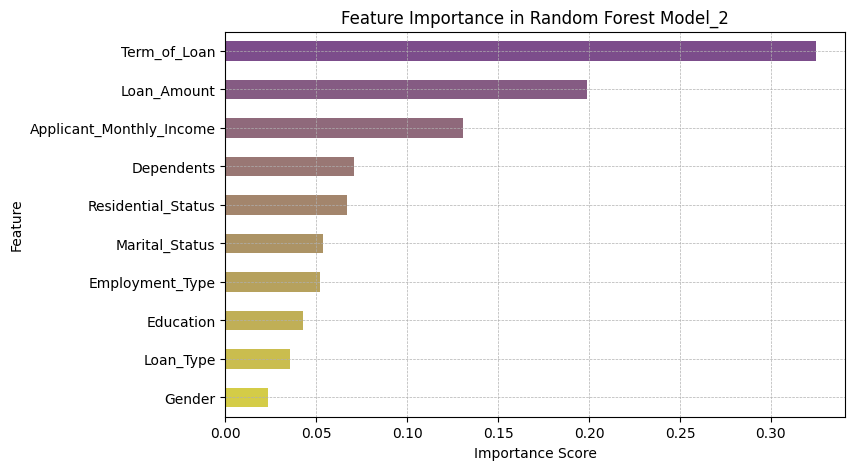

In [68]:
#Feature Importance
features = X_train.columns
importances = DT_model_2.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.head(10)
def get_color_gradient(color1, color2, num_colors):
    color1 = np.array([int(color1[i:i+2], 16) for i in (1, 3, 5)])
    color2 = np.array([int(color2[i:i+2], 16) for i in (1, 3, 5)])
    colors = [
        '#' + ''.join([format(int(c), '02x') for c in (color1 + (color2 - color1) * i / (num_colors - 1)).astype(int)])
        for i in range(num_colors)
    ]
    return colors
# Generate the color gradient
num_features = len(feat_imp)
colors = get_color_gradient("#D4CC47", "#7C4D8B", num_features)

# Plot
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh', x='Feature', y='Importance', color=colors, legend=False)
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest Model_2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [69]:
paramgrid = {'decisiontreeclassifier__max_depth': list(range(1, 20, 2))}

# Create the pipeline
DT_model_2 = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier()
)

# Create the GridSearchCV object
grid_search = GridSearchCV(DT_model_2, paramgrid)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best estimator
print(grid_search.best_estimator_)
grid_search.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Education', 'Marital_Status',
                                      'Employment_Type', 'Residential_Status',
                                      'Dependents', 'Applicant_Monthly_Income',
                                      'Loan_Type'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'Education',
                                          'data_type': dtype('O'),
                                          'mapping': Graduate        1
Not Graduate    2
NaN            -...
                                          'mapping': 0      1
2      2
3+     3
1      4
NaN   -2
dtype: int64},
                                         {'col': 'Applicant_Monthly_Income',
                 

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Education', 'Marital_Status',
                                      'Employment_Type', 'Residential_Status',
                                      'Dependents', 'Applicant_Monthly_Income',
                                      'Loan_Type'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'Education',
                                          'data_type': dtype('O'),
                                          'mapping': Graduate        1
Not Graduate    2
NaN            -...
                                          'mapping': 0      1
2      2
3+     3
1      4
NaN   -2
dtype: int64},
                                         {'col': 'Applicant_Monthly_Income',
                                          'data_type': dtype('O'),
                                          'mapping': 8000 - 10000     1
 > 20000         2
6000 - 8000      3
10000 - 15000    4
15000 - 20000    5
2000 - 3500      6
4500 - 6000      7
3500 - 4500      8
1500 - 2000      9
NaN             -2
dtype: int64},
                                         {'col': 'Loan_Type',
                                          'data_type': dtype('O'),
                                          'mapping': RTL    1
FTL    2
NaN   -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

In [70]:
#Re-evaluating model performance
acc_baseline = y_train.value_counts(normalize = True).max()
acc_train = accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))
acc_val = grid_search.best_estimator_.score(X_val, y_val)

print("Baseline Accuracy:", round(acc_baseline, 2))
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Baseline Accuracy: 0.66
Training Accuracy: 0.78
Validation Accuracy: 0.82


In [71]:
round(accuracy_score(y_test, grid_search.best_estimator_.predict(X_test)), 2)

0.85

In [72]:
#setting up for model deployment with streamlit

import pickle

filename = "DT_model.sav"
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))